## 缺失值 Missing Data


本节代码包括：
- 检查缺失情况
- List-wise deletion
- Mean and median imputation
- Adding a Variable to Capture NA
- End of the Distribution Imputation
- Arbitrary Value Imputation

本节使用的数据集是titanic幸存者预测的数据。该文件已经上传至 /data 目录。

如需自己下载，下载地址[Kaggle website](https://www.kaggle.com/c/titanic/data)。 注意请下载 train.csv，并更名为 titanic.csv 放置在 /data 目录下。

###  检查缺失情况

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 读取数据
data = pd.read_csv('../data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 检查缺失值的总量
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# 或者检查每个变量缺失值的占比
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

###  List-wise deletion

In [8]:
# 删去所有含有缺失值的样本
data_listwise_deletion = data.dropna()
data_listwise_deletion.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Mean and median imputation

TODO

### Adding a Variable to Capture NA

In [11]:
# 增加一个变量，表示观测值是否是缺失的
# Age 变量有 177个缺失记录
data.Age.isnull().sum()

177

In [13]:
# 分割训练集测试集
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [21]:
#　增加一个变量表示年龄是否缺失，用 1/0 表示
X_train['Age_NA'] = np.where(X_train['Age'].isnull(), 1, 0)
X_test['Age_NA'] = np.where(X_test['Age'].isnull(), 1, 0)

X_train.loc[:,['Age','Age_NA']].head(10)

,Age,Age_NA
857,51.0,0
52,49.0,0
386,1.0,0
124,54.0,0
578,NaN,1
549,8.0,0
118,24.0,0
12,20.0,0
157,30.0,0
127,24.0,0


### End of the Distribution Imputation

In [22]:
# 获取Age的分布尾端的界限
X_train.Age.mean()+3*X_train.Age.std()

73.43632005918366

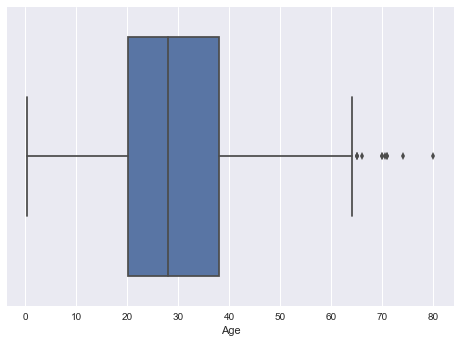

In [24]:
# 箱线图，可以看到在均值 + 3倍 stddev范围之外还存在一些点，我们将用这个界限来填充缺失值

sns.boxplot('Age', data=data)

In [25]:
def impute_na(df, variable, median, extreme):
    df[variable+'_far_end'] = df[variable].fillna(extreme)
    # df[variable].fillna(median, inplace=True)

In [28]:
# 可以看到，缺失的记录填充为了均值+3标准差
impute_na(X_train, 'Age', X_train.Age.median(), X_train.Age.mean()+3*X_train.Age.std())
impute_na(X_test, 'Age', X_train.Age.median(), X_train.Age.mean()+3*X_train.Age.std())

X_train.loc[:,['Age','Age_far_end']].head(20)

,Age,Age_far_end
857,51.0,51.00000
52,49.0,49.00000
386,1.0,1.00000
124,54.0,54.00000
578,NaN,73.43632
549,8.0,8.00000
118,24.0,24.00000
12,20.0,20.00000
157,30.0,30.00000
127,24.0,24.00000


### Arbitrary Value Imputation

In [32]:
# 用一个人为定义的值来填充
def impute_na(df, variable):
    df[variable+'-99999'] = df[variable].fillna(-99999)

impute_na(X_train, 'Age')
impute_na(X_test, 'Age')

X_train.loc[:,['Age','Age-99999']].head(20)

,Age,Age-99999
857,51.0,51.0
52,49.0,49.0
386,1.0,1.0
124,54.0,54.0
578,NaN,-99999.0
549,8.0,8.0
118,24.0,24.0
12,20.0,20.0
157,30.0,30.0
127,24.0,24.0
